In [17]:
import bpm_harm
import pandas as pd 
import numpy as np 
from os import path
import os
import sys
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib

In [2]:
metadf = pd.read_csv('/Users/briancai/Drive/NU/DJ_recommender/mashup-recommender/data/librosa_spotipy_output.csv')

In [3]:
metadf.head()

,track,bpm,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,result_name,key,mode,instrumentalness,speechiness,join
0,Kanye West - Flashing Lights.mp3,90.482,0.036954,0.139994,0.115554,0.031186,0.039300,0.026493,0.160133,0.062567,0.084075,0.111546,0.043015,0.149184,Flashing Lights,6,0,0.000000,0.0399,1
1,Disclosure - Holding On.mp3,124.004,0.104696,0.050207,0.119832,0.012404,0.040165,0.318739,0.008048,0.036769,0.034997,0.131350,0.090003,0.052791,Holding On,5,1,0.000246,0.3330,1
2,Disclosure - Latch.mp3,121.986,0.143480,0.060934,0.025518,0.150654,0.028151,0.116328,0.020705,0.027879,0.176081,0.060752,0.133491,0.056030,Latch,1,1,0.000193,0.0919,1
3,Four Tet - Baby.mp3,127.066,0.140537,0.026422,0.183901,0.066187,0.034937,0.138957,0.007637,0.100334,0.052317,0.175298,0.021419,0.052054,Baby,0,1,0.003250,0.2480,1
4,Kodak Black - Patty Cake.mp3,152.094,0.023424,0.101666,0.050954,0.067617,0.181116,0.059285,0.122313,0.037431,0.151896,0.026322,0.014489,0.163487,Patty Cake,1,0,0.000000,0.1900,1


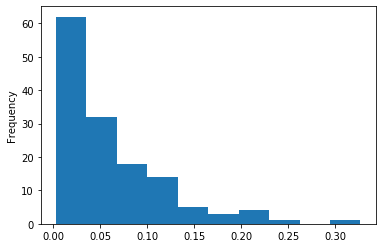

In [4]:
metadf.Db.plot.hist()

In [5]:
metadf['track'] = metadf.track.str.replace('.mp3','')
metadf['track'] = metadf.track.str.replace('.wav','')
metadf['track'] = metadf.track.str.split(' - ').str[1]

In [6]:
metadf.head()

,track,bpm,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,result_name,key,mode,instrumentalness,speechiness,join
0,Flashing Lights,90.482,0.036954,0.139994,0.115554,0.031186,0.039300,0.026493,0.160133,0.062567,0.084075,0.111546,0.043015,0.149184,Flashing Lights,6,0,0.000000,0.0399,1
1,Holding On,124.004,0.104696,0.050207,0.119832,0.012404,0.040165,0.318739,0.008048,0.036769,0.034997,0.131350,0.090003,0.052791,Holding On,5,1,0.000246,0.3330,1
2,Latch,121.986,0.143480,0.060934,0.025518,0.150654,0.028151,0.116328,0.020705,0.027879,0.176081,0.060752,0.133491,0.056030,Latch,1,1,0.000193,0.0919,1
3,Baby,127.066,0.140537,0.026422,0.183901,0.066187,0.034937,0.138957,0.007637,0.100334,0.052317,0.175298,0.021419,0.052054,Baby,0,1,0.003250,0.2480,1
4,Patty Cake,152.094,0.023424,0.101666,0.050954,0.067617,0.181116,0.059285,0.122313,0.037431,0.151896,0.026322,0.014489,0.163487,Patty Cake,1,0,0.000000,0.1900,1


In [16]:
distances = pd.read_csv('/Users/briancai/Drive/NU/DJ_recommender/mashup-recommender/data/distances.csv', index_col = 0)

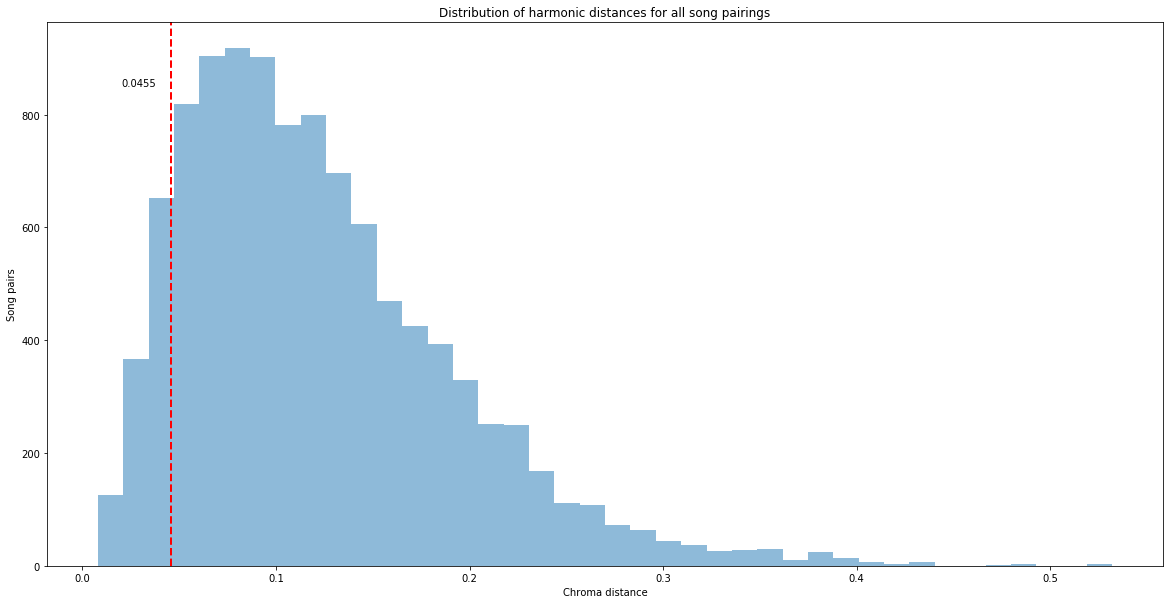

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))
x = distances.dist
num_bins = 40
n, bins, patches = plt.hist(x, num_bins, alpha=0.5)


ax.axvline(x=0.0455, color='r', linestyle='dashed', linewidth=2)

plt.title("Distribution of harmonic distances for all song pairings")

plt.xlabel("Chroma distance")

plt.ylabel("Song pairs")

plt.text(0.02,850,0.0455,rotation=0)

plt.show()

In [8]:
distances.loc[distances.track_x.str.startswith("Kendrick"), ['track_x']] = "Kendrick Lamar - HUMBLE (Skrillex Remix).mp3"
distances.loc[distances.track_y.str.startswith("Kendrick"), ['track_y']] = "Kendrick Lamar - HUMBLE (Skrillex Remix).mp3"

In [9]:
distances_unique = distances.loc[[i for i in range(0, len(distances), 2)]].reset_index(drop = True)

In [10]:
top5p = distances_unique.loc[[i for i in range(0, 523)]]

In [11]:
top5p['track_x'] = top5p.track_x.str.replace('.mp3', '')
top5p['track_y'] = top5p.track_y.str.replace('.mp3', '')
top5p['track_x'] = top5p.track_x.str.replace('.wav', '')
top5p['track_y'] = top5p.track_y.str.replace('.wav', '')
top5p['track_x'] = top5p.track_x.str.split(' - ').str[1]
top5p['track_y'] = top5p.track_y.str.split(' - ').str[1]

In [12]:
tracklist = top5p.track_x.tolist()
tracklist.extend(top5p.track_y.tolist())
tracklist = list(set(tracklist))

In [13]:
metadf.loc[metadf.track.isna(),:]

,track,bpm,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,result_name,key,mode,instrumentalness,speechiness,join


In [15]:
top5p.dist.max()

0.045487479000000004

In [15]:
nodes = metadf.loc[metadf.track.isin(tracklist), ['track', 'track', 'bpm']]

nodes.columns = ['Id', 'Label', 'BPM']

In [16]:
edges = top5p.loc[:, ['track_x', 'track_y', 'dist']]

edges.columns = ['Source', 'Target', 'Weight']

edges['Type'] = 'Undirected'

In [17]:
nodes.head()

,Id,Label,BPM
0,Flashing Lights,Flashing Lights,90.482
1,Holding On,Holding On,124.004
2,Latch,Latch,121.986
3,Baby,Baby,127.066
4,Patty Cake,Patty Cake,152.094


In [18]:
edges.head(30)

,Source,Target,Weight,Type
0,Goh (AC Slater Remix),When A Fire Starts To Burn,0.007910,Undirected
1,D.A.N.C.E,I Want It That Way,0.009291,Undirected
2,Mi Gente,Need You,0.009652,Undirected
3,"Harder, Better, Faster, Stronger",D.A.N.C.E,0.011668,Undirected
4,Pressure (Valentino Khan Remix),Play That Funky Music (Gordo Edit),0.012141,Undirected
5,Omen (Jonas Rathsman Remix),Cream,0.012202,Undirected
6,EDM O'CLOCK,Formation,0.012491,Undirected
7,Baby,Planet,0.012651,Undirected
8,HUMBLE (Skrillex Remix),SICKO MODE,0.013040,Undirected
9,Baby,Midnight Hour,0.013190,Undirected


In [19]:
edge_list = [(top5p.loc[i, 'track_x'],
             top5p.loc[i, 'track_y'],
             {'dist':top5p.loc[i, 'dist']}) for i in range(0,len(top5p))]

In [20]:
G = nx.Graph()

In [21]:
G.add_weighted_edges_from(edge_list)

In [22]:
G.number_of_nodes()

122

In [23]:
G.number_of_edges()

523

In [324]:
eigen_centr = nx.eigenvector_centrality_numpy(G, weight='dist', max_iter=50, tol=0)

In [325]:
eigen_cent_df = pd.DataFrame(eigen_centr, columns = ['track', 'eigenvector_centrality'])

In [326]:
type(eigen_centr)

dict

In [327]:
nodes['eigenvector_centrality'] = nodes.Id.map(eigen_centr)

In [328]:
nodes.sort_values(by = 'eigenvector_centrality', ascending = False)

,Id,Label,BPM,eigenvector_centrality
14,When A Fire Starts To Burn,When A Fire Starts To Burn,123.948000,2.708301e-01
135,Missing You,Missing You,126.996000,2.608357e-01
93,Goh (AC Slater Remix),Goh (AC Slater Remix),129.199219,2.456306e-01
133,TURN OFF THE LIGHTS,TURN OFF THE LIGHTS,128.027000,2.419311e-01
115,Pressure (Valentino Khan Remix),Pressure (Valentino Khan Remix),126.012000,2.390382e-01
...,...,...,...,...
23,Going Bad,Going Bad,86.003000,1.732197e-05
44,Sexual Healing (Kygo Remix),Sexual Healing (Kygo Remix),100.987000,1.144185e-05
83,I'm Sprung,I'm Sprung,99.991000,7.011984e-07
128,Show Me Show Me,Show Me Show Me,122.995000,1.688981e-17


In [329]:
edges.to_csv("/Users/briancai/Drive/NU/DJ_recommender/mashup-recommender/data/edges.csv", index = False)
nodes.to_csv("/Users/briancai/Drive/NU/DJ_recommender/mashup-recommender/data/nodes.csv", index = False)